<div style="text-align: left"><H1><font color=darkblue> CAPM - Capital Asset Pricing Model  </font></H1></div>
<div style="text-align: left"><H4><font color=black>Produced By: Driss Baraket </font></H4></div>

<div style="text-align: center"><H3><font color=green> The General Objective in the Analysis is: </font></H3></div>
<div style="text-align: center"><H3><font color=green> identifing the CAPM of a portfolio. </font></H3></div>
 


###### Portfolio Returns:

## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Market Weights: (the market cap of this company i) / (market cap of all company from i to j)

## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $


### CAPM of a portfolio


## $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

In [19]:
!pip install requests_cache
## Important
import requests_cache
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after= 'CachedSession.expire_after')
# just add headers to your session and provide it to the reader
session.headers = {     'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0',     'Accept': 'application/json;charset=utf-8'     }


  Found existing installation: attrs 19.2.0
    Uninstalling attrs-19.2.0:
      Successfully uninstalled attrs-19.2.0
  Found existing installation: urllib3 1.24.2
    Uninstalling urllib3-1.24.2:
      Successfully uninstalled urllib3-1.24.2


ERROR: conda 4.11.0 requires ruamel_yaml_conda>=0.11.14, which is not installed.
ERROR: requests 2.22.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.8 which is incompatible.


In [51]:
from scipy import stats
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [21]:
spy_etf = web.DataReader('SPY', data_source= 'yahoo', start= '1995-1-1', session= session)

In [22]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6807 entries, 1995-01-03 to 2022-01-12
Data columns (total 6 columns):
High         6807 non-null float64
Low          6807 non-null float64
Open         6807 non-null float64
Close        6807 non-null float64
Volume       6807 non-null float64
Adj Close    6807 non-null float64
dtypes: float64(6)
memory usage: 372.3 KB


In [24]:
spy_etf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-06,470.820007,465.429993,467.890015,467.940002,86858900.0,467.940002
2022-01-07,469.200012,464.649994,467.950012,466.089996,85064800.0,466.089996
2022-01-10,465.739990,456.600006,462.700012,465.510010,119362000.0,465.510010
2022-01-11,469.850006,462.049988,465.230011,469.750000,74303100.0,469.750000
2022-01-12,473.200012,468.940002,471.589996,471.019989,67488100.0,471.019989


In [34]:
aapl = web.DataReader('AAPL',data_source= 'yahoo', start= '1995-1-1', session= session)

In [35]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,0.347098,0.338170,0.347098,0.342634,1.038688e+08,0.290447
1995-01-04,0.353795,0.344866,0.344866,0.351563,1.586816e+08,0.298016
1995-01-05,0.351563,0.345982,0.350446,0.347098,7.364000e+07,0.294231
1995-01-06,0.385045,0.367188,0.371652,0.375000,1.076622e+09,0.317883
1995-01-09,0.373884,0.366071,0.371652,0.367885,2.740864e+08,0.311852


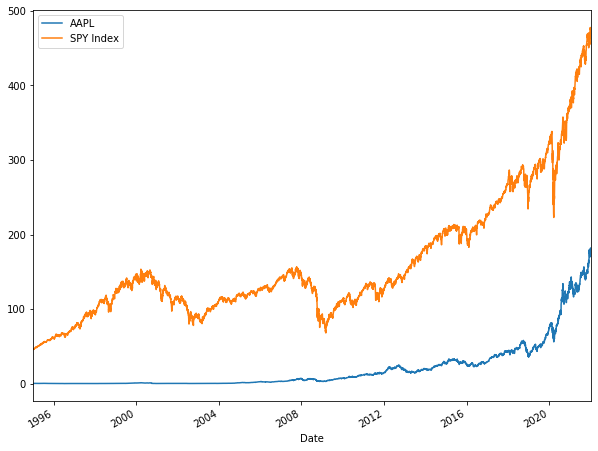

In [36]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

## Compare Cumulative Return

In [37]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

Text(0.5, 1.0, 'Cumulative Return')

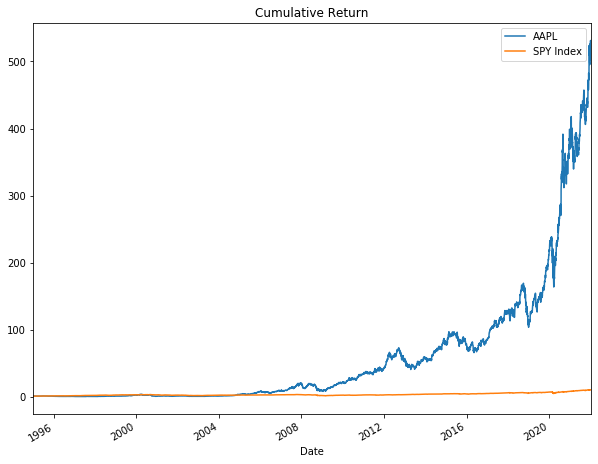

In [38]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

## Get Daily Return

In [39]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

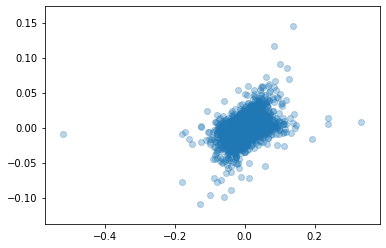

In [40]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3)

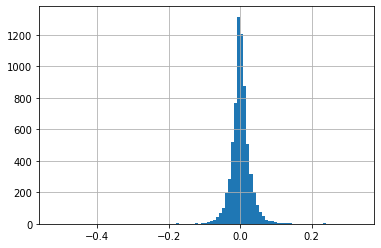

In [41]:
aapl['Daily Return'].hist(bins=100)

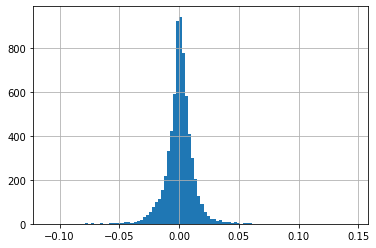

In [42]:
spy_etf['Daily Return'].hist(bins=100)

In [44]:
#why saying aapl['Daily Return'].iloc[1:] is that the first line is Na
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [45]:
beta

0.21259905213782077

In [46]:
alpha

0.00013919322235408254

In [47]:
r_value  #so 0.48 is not a very good fit

0.4814739918111774

## What if our stock was completely related to SP500?

In [52]:
spy_etf['Daily Return'].head()

Date
1995-01-03         NaN
1995-01-04    0.004778
1995-01-05    0.000000
1995-01-06    0.001019
1995-01-09    0.001018
Name: Daily Return, dtype: float64

In [53]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [54]:
noise

array([ 0.00060693,  0.00067316, -0.00071842, ..., -0.00020546,
        0.00047609, -0.0015389 ])

In [55]:
spy_etf['Daily Return'].iloc[1:] + noise

Date
1995-01-04    0.005385
1995-01-05    0.000673
1995-01-06    0.000301
1995-01-09    0.000655
1995-01-10    0.002640
                ...   
2022-01-06   -0.000754
2022-01-07   -0.003352
2022-01-10   -0.001450
2022-01-11    0.009584
2022-01-12    0.001165
Name: Daily Return, Length: 6806, dtype: float64

In [56]:
beta,alpha,r_value,p_value,std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:]+noise,spy_etf['Daily Return'].iloc[1:])

In [57]:
beta   #this is just to show that beta is the sensitivity of stock A according the flucuation of stock B

0.9941434925234653

In [58]:
alpha

4.554050630721062e-06

#### Thank you!